### **Predictive Modeling of Apartment Sale Prices in Daegu: A Data Science Approach**

[Dataset Daegu Apartment](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

### 1.1 Latar Belakang

Daegu adalah kota terbesar ketiga di Korea Selatan setelah Seoul dan Busan, dengan populasi sekitar 2,5 juta jiwa. Terletak di tenggara Korea, di antara Sungai Geumho dan Nakdong, Daegu dikenal sebagai pusat pertumbuhan ekonomi Korea pada era 1960–1980, terutama melalui industri elektronik dan tekstil. Dengan iklim subtropis yang lembap, Daegu juga dikenal sebagai produsen utama apel yang dipasarkan secara nasional dan internasional.



### 1.2 Rumusan Masalah
Sebagai salah satu kota metropolitan di Korea, Daegu menjadi magnet urbanisasi karena kelengkapan fasilitas dan ketersediaan lapangan pekerjaan. Hal ini menyebabkan permintaan terhadap hunian, khususnya apartemen, meningkat. Namun, masyarakat menghadapi tantangan dalam memilih apartemen yang sesuai dari segi harga dan fasilitas yang ditawarkan. Maka dari itu, diperlukan sebuah sistem atau alat bantu yang dapat memberikan estimasi harga apartemen secara akurat berdasarkan parameter-parameter penting seperti luas bangunan, usia bangunan, dan ketersediaan fasilitas di sekitarnya.

### 1.3 Tujuan

Proyek ini bertujuan untuk membangun sebuah sistem prediktif yang dapat mengestimasi harga jual apartemen di Kota Daegu. Dengan memanfaatkan data historis dan fitur-fitur penting dari unit apartemen, sistem ini diharapkan dapat membantu calon pembeli dalam merencanakan pembelian properti secara lebih tepat dan terinformasi.

### 1.4 Pendekatan Analitik

Analisis akan dilakukan untuk mengidentifikasi hubungan antara fitur-fitur apartemen dan harga jualnya. Pendekatan yang digunakan adalah supervised learning dengan metode regresi, untuk membangun model prediksi harga yang andal. Model ini akan dilatih pada data apartemen di Daegu, dan kemudian dievaluasi untuk melihat sejauh mana model dapat memprediksi harga dengan akurat.

### 1.5 Evaluasi Model

Model akan dievaluasi menggunakan beberapa metrik regresi seperti:

1. RMSE (Root Mean Squared Error): Mengukur seberapa besar error dalam satuan aslinya.

2. MAE (Mean Absolute Error): Menunjukkan rata-rata dari selisih absolut antara nilai aktual dan prediksi.

3. MAPE (Mean Absolute Percentage Error): Mengukur kesalahan dalam bentuk persentase.

Apabila model regresi linier digunakan, maka R-squared dan Adjusted R-squared juga akan menjadi indikator penting untuk menilai sejauh mana model menjelaskan variabilitas data.

## **2. Data Understanding**

**Features Information**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Hallway space type |
| TimeToSubway | Object | Distance to nearest Subway |
| SubwayStation | Object | Name of Subway station |
| N_FacilitiesNearBy(ETC) | Float | Number of ETC facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of public office nearby |
| N_SchoolNearBy(University) | Float | Number of university nearby |
| N_Parkinglot(Basement) | Float | Size of parking lot by sqf |
| YearBuilt | Integer | Year built of the apartment unit |
| N_FacilitiesInApt | Integer | Number of facilities in Apt |
| Size(sqf) | Integer | Size of apartment unit in sqf |
| SalePrice | Integer | Price of apartment unit in dollars |

<br>

In [49]:
# Import library sesuai kebutuhan EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
#Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### **Exploratory Data Analysis**

**Distribution of Daegu Apartment price**

<Figure size 700x700 with 0 Axes>

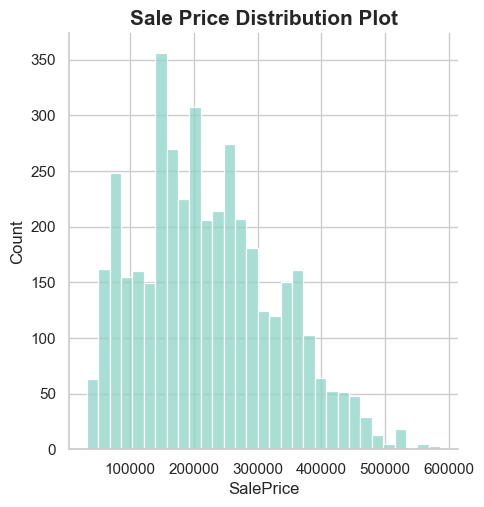

In [51]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(7, 7))
sns.displot(df['SalePrice'])
plt.title('Sale Price Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga apartemen Daegu di atas, terlihat bahwa terdapat 'right-skewed distribution'. Ini berarti terdapat skewness positif pada fitur SalePrice.

**Jumlah properti berdasarkan tipe Hallway**

In [52]:
print(f'Hallway Type terraced berjumlah', df[df['HallwayType']=='terraced'].count()['HallwayType'])
print(f'Hallway Type mixed berjumlah', df[df['HallwayType']=='mixed'].count()['HallwayType'])
print(f'Hallway Type corridor berjumlah', df[df['HallwayType']=='corridor'].count()['HallwayType'])

Hallway Type terraced berjumlah 2528
Hallway Type mixed berjumlah 1131
Hallway Type corridor berjumlah 464


In [53]:
# Cek median Sale price untuk tiap Hallway Type
df_median_saleprice = df.groupby(by=['HallwayType']).agg({'SalePrice':'median'}).reset_index()
df_median_saleprice = df_median_saleprice.set_index('HallwayType')
df_median_saleprice = df_median_saleprice.sort_values('SalePrice', ascending =False)
df_median_saleprice.head()

,SalePrice
HallwayType,
terraced,264601.0
mixed,153539.0
corridor,74557.0


Bisa dilihat harga median yang tertinggi berdasarkan hallwaytype adalah terraced diikuti oleh mixed dan yang terakhir corridor. 

In [54]:
# Mencari kolom yg berisi nilai numerikal
num_feature = [fea for fea in df.describe().columns]
len(num_feature)

8

Jumlah kolom yang berisi data numerikal adalah 8. Artinya, kolom-kolom tersebut sudah tidak perlu diolah/diencoding sebelum dilakukan permodelan.

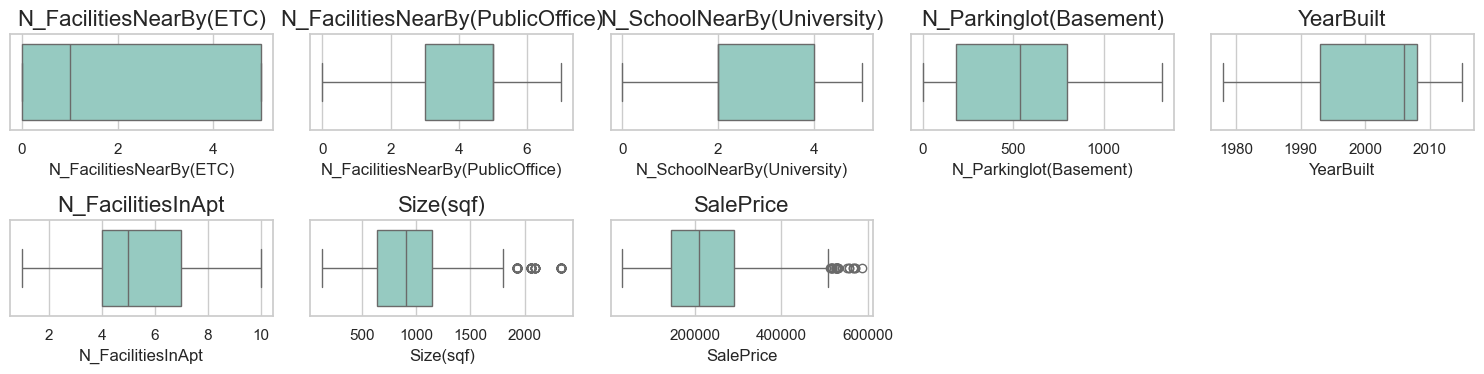

In [55]:
# Menunjukkan distribusi data tiap feature/kolom menggunakan boxplot
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(5,5, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


Dari boxplot diatas, dapat dilihat range Q1 dan Q3 pada setiap feature. Juga, beberapa kolom yang memiliki outlier. Apakah outlier ini akan digunakan atau dibuang akan dibahas pada tahap selanjutnya di data preprocessing.

## **3. Data Preprocessing**

Pada tahap ini, dilakukan proses pembersihan (cleaning) terhadap data agar data yang akan digunakan dalam analisis dan pemodelan berada dalam kondisi optimal. Beberapa langkah utama yang dilakukan meliputi:

Menghapus fitur yang tidak relevan, yaitu fitur-fitur yang tidak memberikan kontribusi signifikan terhadap pemecahan masalah atau target prediksi.

Menangani nilai hilang (missing values) dengan pendekatan yang sesuai. Hal ini dapat dilakukan dengan menghapus fitur yang memiliki terlalu banyak nilai kosong dan tidak memiliki nilai informatif, atau dengan melakukan imputasi menggunakan nilai yang paling masuk akal berdasarkan konteks data (seperti rata-rata, median, atau metode statistik lainnya).

Untuk menjaga integritas data selama proses ini, digunakan salinan dari dataframe utama sehingga proses preprocessing dan rekayasa fitur (feature engineering) tidak memengaruhi data asli.

In [56]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [57]:
# Cek datatipe tiap feature dan null value pada dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


### 3.1 Data Correlation

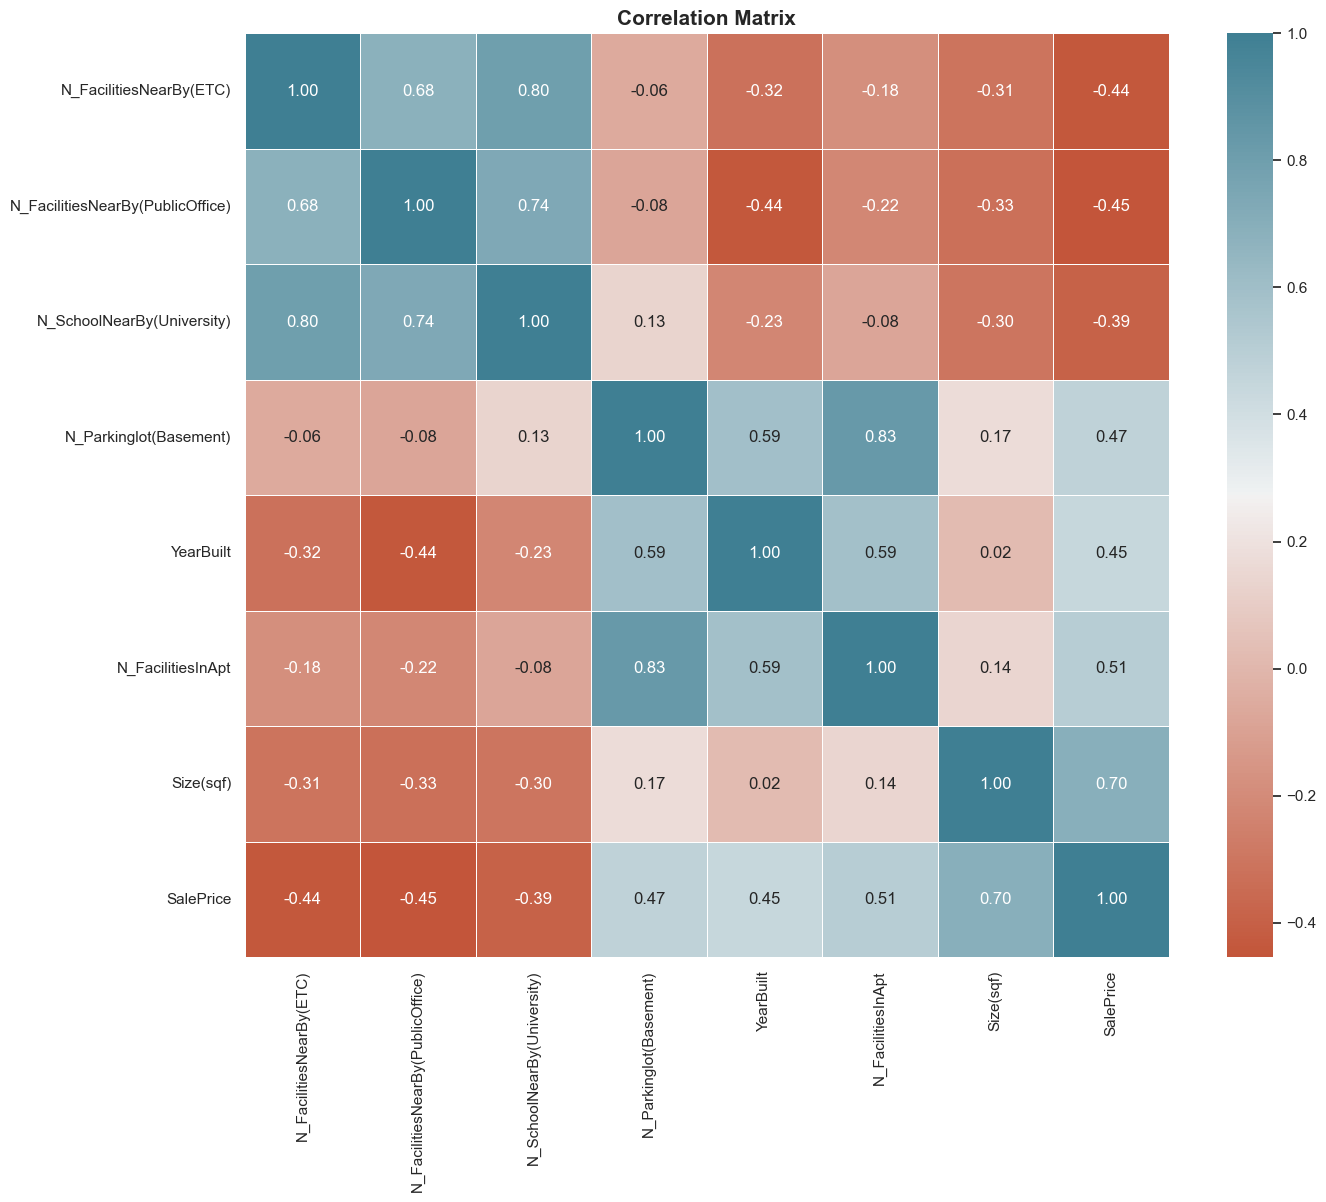

In [58]:
# Ambil hanya kolom numerik
df_num = df_model.select_dtypes(include='number')

# Hitung korelasi
corr = df_num.corr(method='pearson')

# Visualisasikan heatmap
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=0.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

Karena banyak terdapat **multicolinearity** antar feature, contohnya N_SchoolNearBy(University) dan N_FacilitiesNearby(PublicOffice) maka kita tidak akan menggunakan model linear regression pada dataset ini.

### 3.2 Data Outliers

Seperti sebelumnya ditunjukkan pada tahap EDA, tidak banyak terdapat outliers dalam dataset Daegu Apartemen. Outliers hanya terlihat terdapat pada feature Size(sqf) dan feature SalePrice.

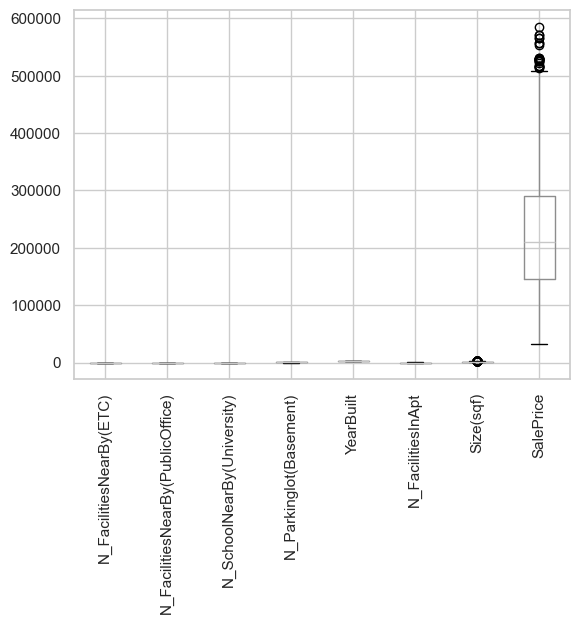

In [59]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

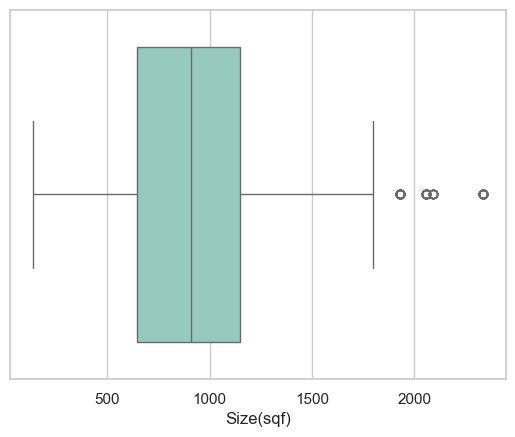

In [60]:
# Plot boxplot untuk mengecek outliers pada feature Size(sqf)
sns.boxplot(x=df_model['Size(sqf)']);

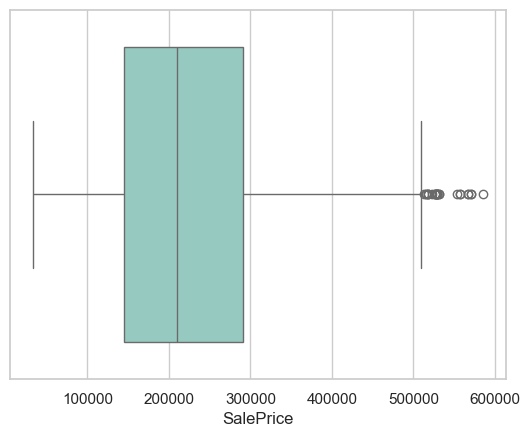

In [61]:
# Plot boxplot untuk mengecek outliers pada feature Size(sqf)
sns.boxplot(x=df_model['SalePrice']);

In [62]:
# Cek jumlah data untuk tiap kategori pada ketiga feature dibawah
nama_kolom = ['HallwayType','TimeToSubway', 'SubwayStation',]
for i in nama_kolom:
    print(i)
    print(df_model[i].value_counts())

HallwayType
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64
TimeToSubway
TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64
SubwayStation
SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64


In [63]:
# Cek jumlah unique value pada semua feature
listItem = []
for col in df_model.columns:
    x = df_model[col].value_counts().count()
    listItem.append(x)
    
pd.DataFrame(listItem, index = df_model.columns, columns = ['Jumlah Unique Values'])

,Jumlah Unique Values
HallwayType,3
TimeToSubway,5
SubwayStation,8
N_FacilitiesNearBy(ETC),4
N_FacilitiesNearBy(PublicOffice),8
N_SchoolNearBy(University),6
N_Parkinglot(Basement),20
YearBuilt,16
N_FacilitiesInApt,9
Size(sqf),89


In [64]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [65]:
# Outliers pada fitur Size(sqf)
find_anomalies(df_model['Size(sqf)'])

IQR: 505.0
limit_bawah: -113.5
limit_atas: 1906.5


In [66]:
df_model[df_model['Size(sqf)']>1906.5]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
106,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,243362
134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,424778
207,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,348283
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
288,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,300884
...,...,...,...,...,...,...,...,...,...,...,...
3949,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,556637
3977,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,383716
4027,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,193805
4074,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,254424


In [67]:
# Outliers pada fitur SalePrice
find_anomalies(df_model['SalePrice'])

IQR: 146398.0
limit_bawah: -74845.0
limit_atas: 510747.0


In [68]:
df_model[df_model['SalePrice']>510747.0].count()['SalePrice']

27

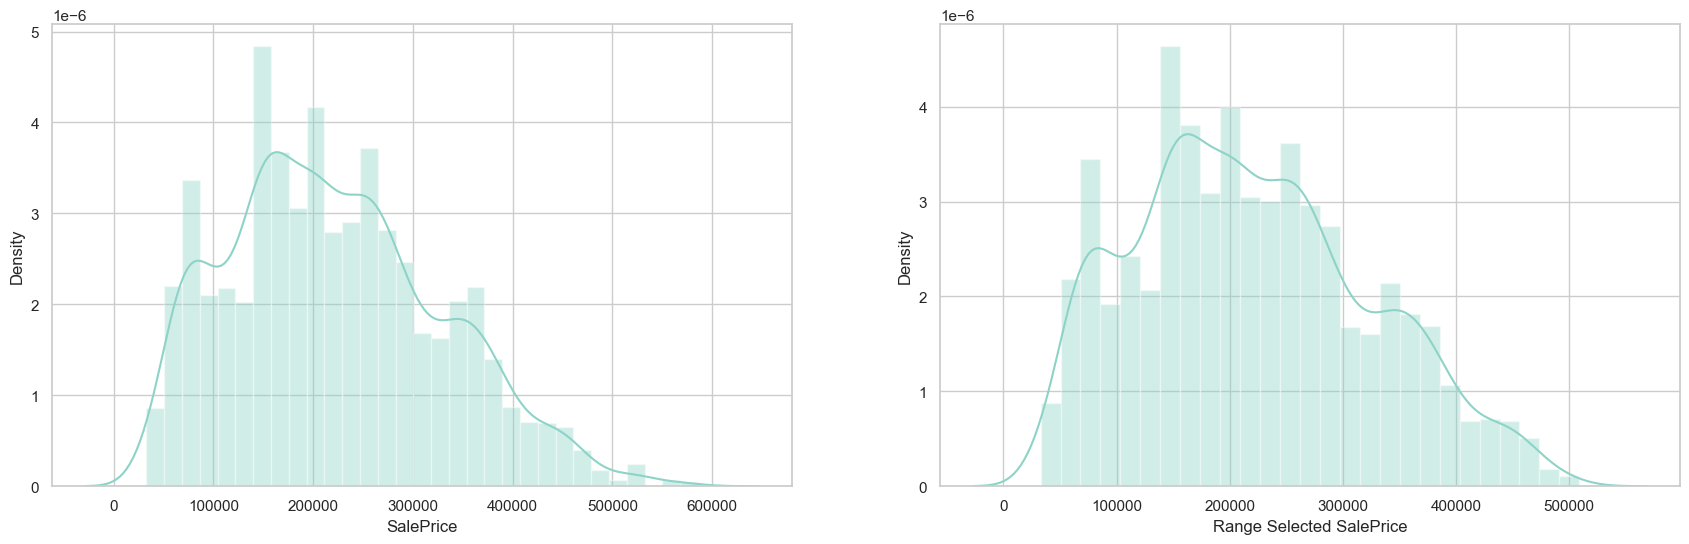

In [69]:
# Melakukan filtering pada data
df_model = df_model[(df_model['SalePrice'] <= 510747.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('SalePrice')
axes[1].set_xlabel('Range Selected SalePrice'); 

In [70]:
# Cek deskriptif statistik kolom 'SalePrice' setelah filtering
df_model['SalePrice'].describe()

count      4096.000000
mean     219692.548828
std      103961.039574
min       32743.000000
25%      144752.000000
50%      207964.000000
75%      287610.000000
max      508849.000000
Name: SalePrice, dtype: float64

## **4. Modeling**

In [71]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [72]:
!pip install --upgrade category_encoders

In [73]:
!pip install xgboost


### 4.1 Encoding

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [74]:
# cek kategori-kategori ordinal yang terdapat pada feature 'TimeToSubway'
df_model['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [75]:
# ordinal mapping
ordinal_mapping = [
    {'col':'TimeToSubway', 'mapping':{'0-5min':5, '5min~10min':10, '10min~15min':15, '15min~20min':20, 'no_bus_stop_nearby':0}}
] 

In [76]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType', 'SubwayStation']),
    ('Ordinal', ce.OrdinalEncoder(), ['TimeToSubway'])
], remainder='passthrough')

### 4.2 Data Splitting

In [77]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

### 4.3 Train and Test Splitting

In [78]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0)

### 4.4 Choose a Benchmark Model

In [79]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54044.1414728  -55739.71895647 -56447.19262077 -52137.43557332
 -52951.17975787] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42201.73070759 -44779.4144717  -45732.81516951 -41939.18389972
 -42464.50750445] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22684392 -0.23977419 -0.22737554 -0.21891346 -0.22374728] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-45595.32998763 -45947.41334953 -49025.04924158 -45203.04199983
 -46495.40235966] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-35435.72951396 -34395.79434541 -37322.42480401 -35030.87853463
 -35374.30453054] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [80]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-54263.933676,1627.156259,-43423.530351,1535.384102,-0.227331,0.006910
1,KNN Regressor,-46453.247388,1354.315005,-35511.826346,977.732886,-0.192468,0.007497
2,DecisionTree Regressor,-42654.278454,889.710513,-32902.426379,772.751555,-0.173245,0.005684
3,RandomForest Regressor,-42586.970692,952.341499,-32859.970224,788.452831,-0.173170,0.005634
4,XGBoost Regressor,-42611.740625,946.168172,-32871.441797,799.479361,-0.173008,0.005862


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu RandomForest dan XGBoost

### 4.5 Predict to Test Set with the Benchmark Model

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [81]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,42490.255636,33788.769531,0.182978
RandomForest,42545.790475,33797.250652,0.183108


- Ketika dilakukan prediksi pada test set, performa XGBoost sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


### 4.6 Hyperparameter Tuning

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [82]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [83]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state = 1  
)

In [84]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType',
                                                                                'SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [85]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,0.133081,0.014166,0.010872,0.001165,0.6,0.001000,190,5,0.04,9,...,757.856567,5,-0.193563,-0.178161,-0.181053,-0.175932,-0.183652,-0.182472,0.006128,12
48,0.120237,0.022532,0.011055,0.001101,0.5,0.007743,195,4,0.35,9,...,811.022445,10,-0.197337,-0.173209,-0.181515,-0.177780,-0.182609,-0.182490,0.008121,13
23,0.084362,0.005128,0.010358,0.000679,0.9,3.593814,153,4,0.33,9,...,742.859879,1,-0.192901,-0.173694,-0.181324,-0.175554,-0.182380,-0.181171,0.006731,2
20,0.088800,0.011157,0.009649,0.000874,0.9,0.007743,143,4,0.38,6,...,832.936391,3,-0.192986,-0.173735,-0.182841,-0.175669,-0.183041,-0.181654,0.006787,5
24,0.083328,0.003685,0.009661,0.000368,0.9,10.000000,146,4,0.06,5,...,732.021212,18,-0.197474,-0.183857,-0.180000,-0.178159,-0.186934,-0.185285,0.006812,31


In [86]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -42355.73984375
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


### 4.7 Predict to Test Set with the Tuned Model

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [87]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42313.443727,33670.113281,0.182374


### 4.8 Performance Comparison

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [88]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,42490.255636,33788.769531,0.182978


In [89]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,42313.443727,33670.113281,0.182374


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 42478.452, 33781.105, 0.182
- RMSE, MAE & MAPE setelah tuning: 42390.041, 33613.403, 0.181

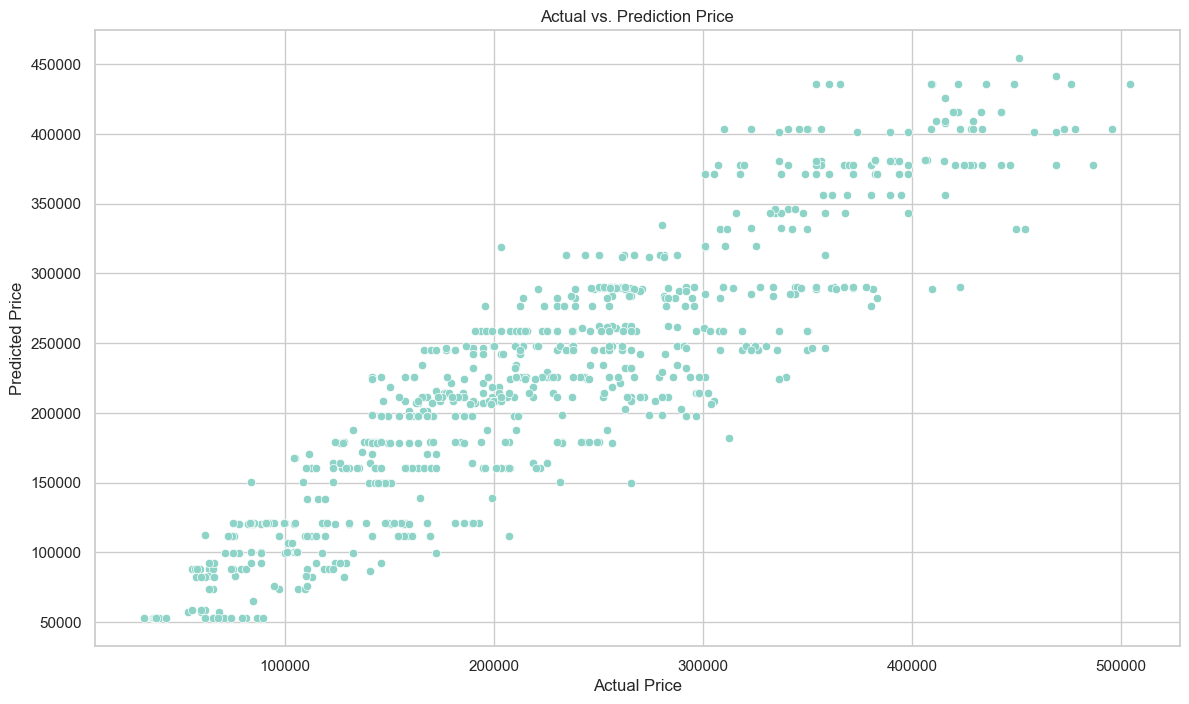

In [90]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

### 4.9 Feature Importances

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature importances.

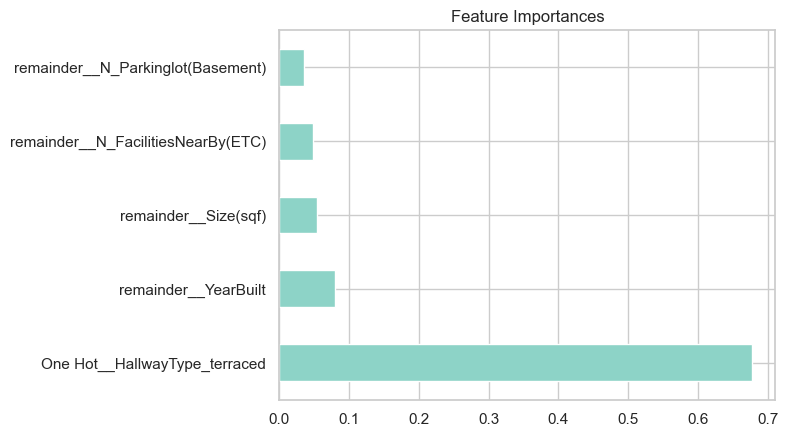

In [93]:
# Plot feature importances
feature_names = transformer.get_feature_names_out()
feature_imp = pd.Series(
    xgb_tuning['model'].feature_importances_,
    index=feature_names
).sort_values(ascending=False).head()

feature_imp.plot(kind='barh', title='Feature Importances');

## **5. Conclusion**

Berdasarkan hasil pemodelan yang telah dilakukan, fitur 'HallwayType' dan 'YearBuilt' teridentifikasi sebagai variabel yang paling berpengaruh terhadap prediksi harga jual apartemen ('SalePrice') di Kota Daegu.

Model regresi yang dibangun dievaluasi menggunakan metrik RMSE, MAE, dan MAPE. Nilai MAPE setelah proses hyperparameter tuning menunjukkan bahwa rata-rata kesalahan prediksi model berada pada kisaran 18%. Artinya, jika model ini digunakan untuk memperkirakan harga apartemen dengan harga maksimum sekitar USD 510,747, maka estimasi harga yang dihasilkan dapat meleset sekitar USD 91,934 dari harga sebenarnya.

Meskipun demikian, performa model masih berada dalam batas yang dapat diterima, terutama jika melihat pola distribusi antara nilai aktual dan prediksi yang tidak terlalu menyimpang secara visual. Namun, terdapat beberapa potensi bias yang perlu diperhatikan, antara lain:

Keterbatasan fitur yang tersedia dalam dataset, yang belum merepresentasikan seluruh aspek properti secara komprehensif.

Beberapa fitur penting seperti lokasi lantai apartemen (Floor), sistem pemanas (HeatingType), serta informasi lebih detail mengenai fasilitas pendidikan (hanya tersedia untuk tingkat universitas) tidak tersedia dalam dataset.

Dengan demikian, meskipun model ini sudah memberikan prediksi yang cukup baik, performanya kemungkinan dapat ditingkatkan dengan penambahan fitur-fitur yang lebih representatif terhadap kondisi sebenarnya di lapangan.



## **6. Recommendation**

Untuk meningkatkan performa model dan menghasilkan prediksi harga apartemen yang lebih akurat di masa mendatang, beberapa rekomendasi yang dapat dilakukan antara lain:

1. Penambahan fitur yang lebih relevan dan berkorelasi tinggi dengan harga apartemen ('SalePrice')
Misalnya, fitur seperti lokasi lantai unit apartemen (Floor), sistem pemanas (HeatingType), atau fasilitas pendidikan lebih lengkap (elementary, junior high, high school) dapat meningkatkan kemampuan model dalam menangkap variasi harga secara lebih akurat. Selain itu, memperbarui data dengan informasi terbaru akan membantu model tetap relevan dengan kondisi pasar saat ini.

2. Eksplorasi model yang lebih kompleks jika tersedia lebih banyak data
Jika dataset diperluas baik dari segi jumlah sampel maupun fitur, maka pemanfaatan model yang lebih kompleks seperti ensemble methods atau deep learning models (misalnya RNN atau XGBoost) dapat dieksplorasi untuk meningkatkan akurasi. Namun, perlu diperhatikan bahwa model yang terlalu kompleks dapat mengurangi interpretabilitas dan berisiko overfitting jika data tidak memadai.

3. Analisis lebih dalam terhadap observasi dengan error tinggi
Melakukan analisis terhadap data yang memiliki nilai error prediksi tinggi dapat membantu mengidentifikasi pola atau fitur-fitur yang mungkin belum diakomodasi dengan baik oleh model. Dengan memahami sumber error ini, kita dapat melakukan penyesuaian atau rekayasa fitur tambahan untuk meningkatkan performa model ke depan.

****

#### **Save Model**

In [111]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Daegu_Apartment.sav', 'wb'))

In [112]:
# Load model
filename = 'Daegu_Apartment.sav'
loaded_model = pickle.load(open(filename, 'rb'))